In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tx, ids = load_csv_data(DATA_TRAIN_PATH)

In [3]:
from implementations import *
#from data_analysis import *
#from visualisation import *
#from preprocessing import *

## Do your thing crazy machine learning thing here :) ...

In [ ]:
#Try with all data

initial_w = np.zeros(tx.shape[1])
max_iters = 100
gamma = 1e-3

## Test on some small data
#weights, loss = logistic_regression(y[:200000], tx[:200000], initial_w, max_iters, gamma)
#weights, loss = least_squares(y[:200000], tx[:200000]) 
#weights, loss = ridge_regression(y[:200000], tx[:200000], gamma)
#weights, loss = least_squares_SGD(y[:200000], tx[:200000], initial_w, max_iters, gamma)
#weights, loss = least_squares_GD(y[:200000], tx[:200000], initial_w, max_iters, gamma)

print(loss)
y_pred = predict_labels(weights, tx[30000:])
print(np.dot(tx[30000:], weights))
print(weights.shape)

accuracy = np.sum(y_pred==y[30000:]) / y_pred.shape[0]

print(accuracy)

#create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

In [ ]:
#Try with normalized data

initial_w = np.zeros(tX.shape[1])
max_iters = 100
gamma = 1e-3

## Test on some small data
#weights, loss = logistic_regression(y[:30000], tX[:30000], initial_w, max_iters, gamma)
#(weights, loss) = least_squares(y[:30000], tX[:30000]) #works
#(weights, loss) = ridge_regression(y[:30000], tX[:30000], gamma) #works
(weights, loss) = least_squares_SGD(y[:30000], normalized_x[:30000], initial_w, max_iters, gamma)

print(loss)
y_pred = predict_labels(weights, normalized_x[30000:])
print(np.dot(normalized_x[30000:], weights))
print(weights.shape)

accuracy = np.sum(y_pred==y[30000:]) / y_pred.shape[0]

print(accuracy)

#create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

In [ ]:
#Quick testing of functions
w_initial = np.ones(30)
max_iters=10
gamma = 0.1
lambda_ = 0.01
w_lsgd = least_squares_GD(y, tX, w_initial, max_iters, gamma)
w_lssgd = least_squares_SGD(y, tX, w_initial, max_iters, gamma)
w_ls = least_squares(y, tX)
w_rg = ridge_regression(y, tX, lambda_)

In [ ]:
print(w_lsgd, w_lssgd, w_ls, w_rg)

## Generate predictions and save ouput in csv format for submission:

In [ ]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [ ]:
OUTPUT_PATH = '../output' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

## Selection of model parameters

In [4]:
from param_selection import gamma_grid_search, lambda_grid_search

folder_path = '../figs/'
k_fold = 4

In [5]:
gammas = np.logspace(-5, -1, 10)

loss_logreg, loss_ls_GD, loss_ls_SGD = gamma_grid_search(y, tx, gammas, k_fold)

1
2
3
4


/Users/Nicolas/Desktop/MA3/ML/ML/project1/scripts/implementations.py:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


5
6
7
8
9
10


In [6]:
def plot_gamma_search(gammas, losses, folder_path):

    fig, axes = plt.subplots(1, 3, figsize=(12, 5))

    xlabels = ['logistic_regression', 'least_squares_GD', 'least_squares_SGD']

    for ax_nb in range(3):
        
        loss = np.array(losses[ax_nb])
        
        axes[ax_nb].semilogx(gammas, loss[:, 0], marker=".", color='b', label='train loss')
        axes[ax_nb].semilogx(gammas, loss[:, 1], marker="x", color='r', label='test loss')
        if ax_nb==0:
            axes[ax_nb].set_ylabel("loss")
        if ax_nb==2:
            axes[ax_nb].set_xlim([1e-5, 1e-3])
        
        if ax_nb==1 or ax_nb==2:
            axes[ax_nb].set_ylim([0.125, 0.2])
            
        axes[ax_nb].set_xlabel(xlabels[ax_nb])
        axes[ax_nb].grid(True)
        axes[ax_nb].legend(loc="upper right")

    fig.suptitle('Gamma grid search')
    plt.tight_layout()
    plt.savefig((folder_path+'gammas'))
    plt.show()

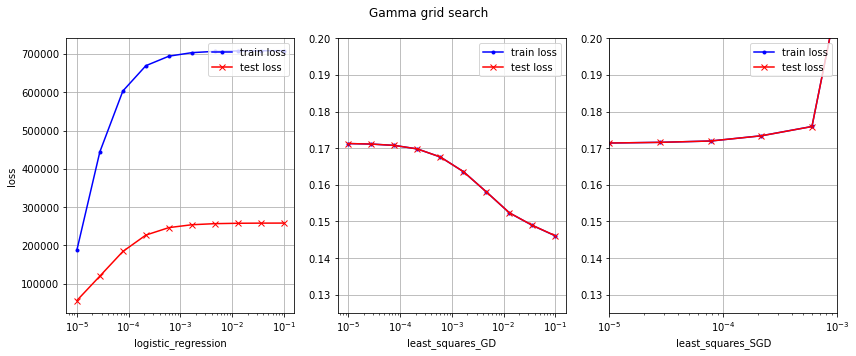

In [7]:
plot_gamma_search(gammas, [loss_logreg, loss_ls_GD, loss_ls_SGD], folder_path)

In [8]:
lambdas = np.logspace(-5, 0, 15)
loss_logreg_reg, loss_ridge = lambda_grid_search(y, tx, lambdas, k_fold)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [9]:
def plot_lambda_search(lambdas, losses, folder_path):

    fig, axes = plt.subplots(1, 2, figsize=(8, 5))

    xlabels = ['reg_logistic_regression', 'ridge_regression']

    for ax_nb in range(2):
        
        loss = np.array(losses[ax_nb])
        axes[ax_nb].plot(lambdas, loss[:, 0], marker=".", color='b', label='train loss')
        axes[ax_nb].semilogx(lambdas, loss[:, 1], marker=".", color='r', label='test loss')
        if ax_nb==0:
            axes[ax_nb].set_ylabel("loss")
        axes[ax_nb].set_xlabel(xlabels[ax_nb])
        axes[ax_nb].grid(True)
        axes[ax_nb].legend(loc="upper right")

    fig.suptitle('Lambda grid search')
    plt.tight_layout()
    plt.savefig((folder_path+'lambdas'))
    plt.show()

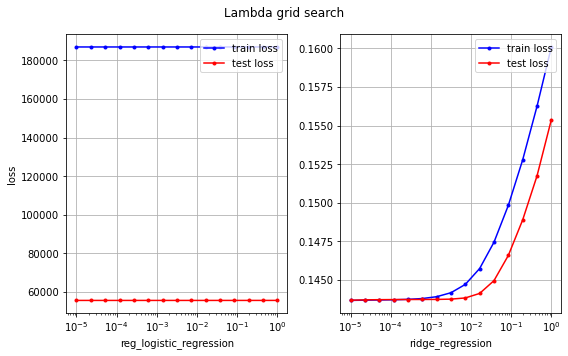

In [10]:
plot_lambda_search(lambdas, [loss_logreg_reg, loss_ridge], folder_path)

## Compare the performance of the models (accuracy)

In [11]:
from param_selection import compare_models

In [12]:
gamma_logreg = 1e-5
gamma_logreg_reg = gamma_logreg
gamma_ls_GD = 1e-1
gamma_ls_SGD = 1e-2
gammas = [gamma_logreg, gamma_logreg_reg, gamma_ls_GD, gamma_ls_SGD]

lambda_logreg_reg = 1e-3
lambda_ridge = 1e-4
lambdas = [lambda_logreg_reg, lambda_ridge]

In [13]:
acc_logreg, acc_logreg_reg, acc_ls_GD, acc_ls_SGD, acc_ridge = compare_models(y, tx, gammas, lambdas, k_fold)

In [14]:
print(acc_logreg, acc_logreg_reg, acc_ls_GD, acc_ls_SGD, acc_ridge)

0.663376 0.663376 0.709252 0.49817200000000006 0.7177520000000002
